## Wein's Law: Stellar Surface Temperature and Peak Wavelengths

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, Layout
%matplotlib widget

### Wein's Law

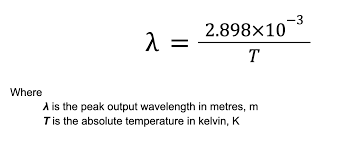


The effective surface temperature of the sun is 5772 K



In [4]:
T = 5772 #K
b = 2.897771955*10**(-3)

peak_wavelength = b/T

print("peak wavelength of our sun: ", peak_wavelength)
print("or", peak_wavelength*10**9, "nm")

peak wavelength of our sun:  5.020394932432432e-07
or 502.0394932432432 nm


This corresponds to light blue on the Visible light spectrum


Below is an interactive slider that shows the corresponding peak wavelength for varying temperatures:

In [7]:
@interact(T=(1,30000))
def weins(T):
    b = 2.897771955*10**(-3) # m K
    lp = b/T
    print(f"The peak wavelength for temp {T:.0f} K is : {lp*10**9:.0f} nm")

interactive(children=(IntSlider(value=15000, description='T', max=30000, min=1), Output()), _dom_classes=('wid…

Bellatrix, a star in the Orion Constellation, has a surfuace temperature of 21,500 K. Using the slider, Bellatrix probably has a peak wavelength of 134.8 nm

## Black-Body Radiation

All stars emit black-body radiation. This radiation varies for each wavelength. We can use Planck's Law to calculate the radiation emitted at other wavelengths: 



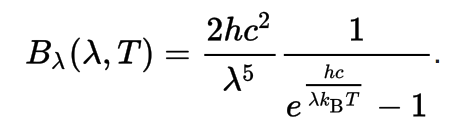

Let's create a plot of spectral intensity over the wavelength range 10-3000 nm.

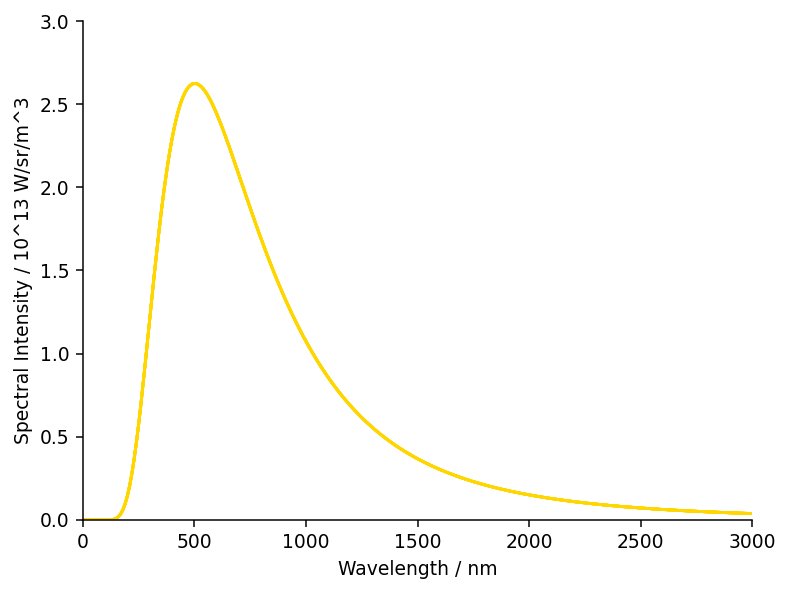

In [17]:
T = 5772 # K
kB = 1.380649*10**(-23) # J/K
c = 299792458 # m/s
h = 6.62607015*10**(-34) # Js
l = np.arange(10,3000,10)
l = l*10**(-9)
B = 2*h*c**2/l**5 * 1/(np.exp(h*c/(l*kB*T))-1)

fig = plt.figure(2)
ax = plt.subplot(xlim=(0,3000),ylim=(0,3))
ax.plot(l*10**9, B/10**13, c="gold")
ax.set_xlabel("Wavelength / nm")
ax.set_ylabel("Spectral Intensity / 10^13 W/sr/m^3")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig

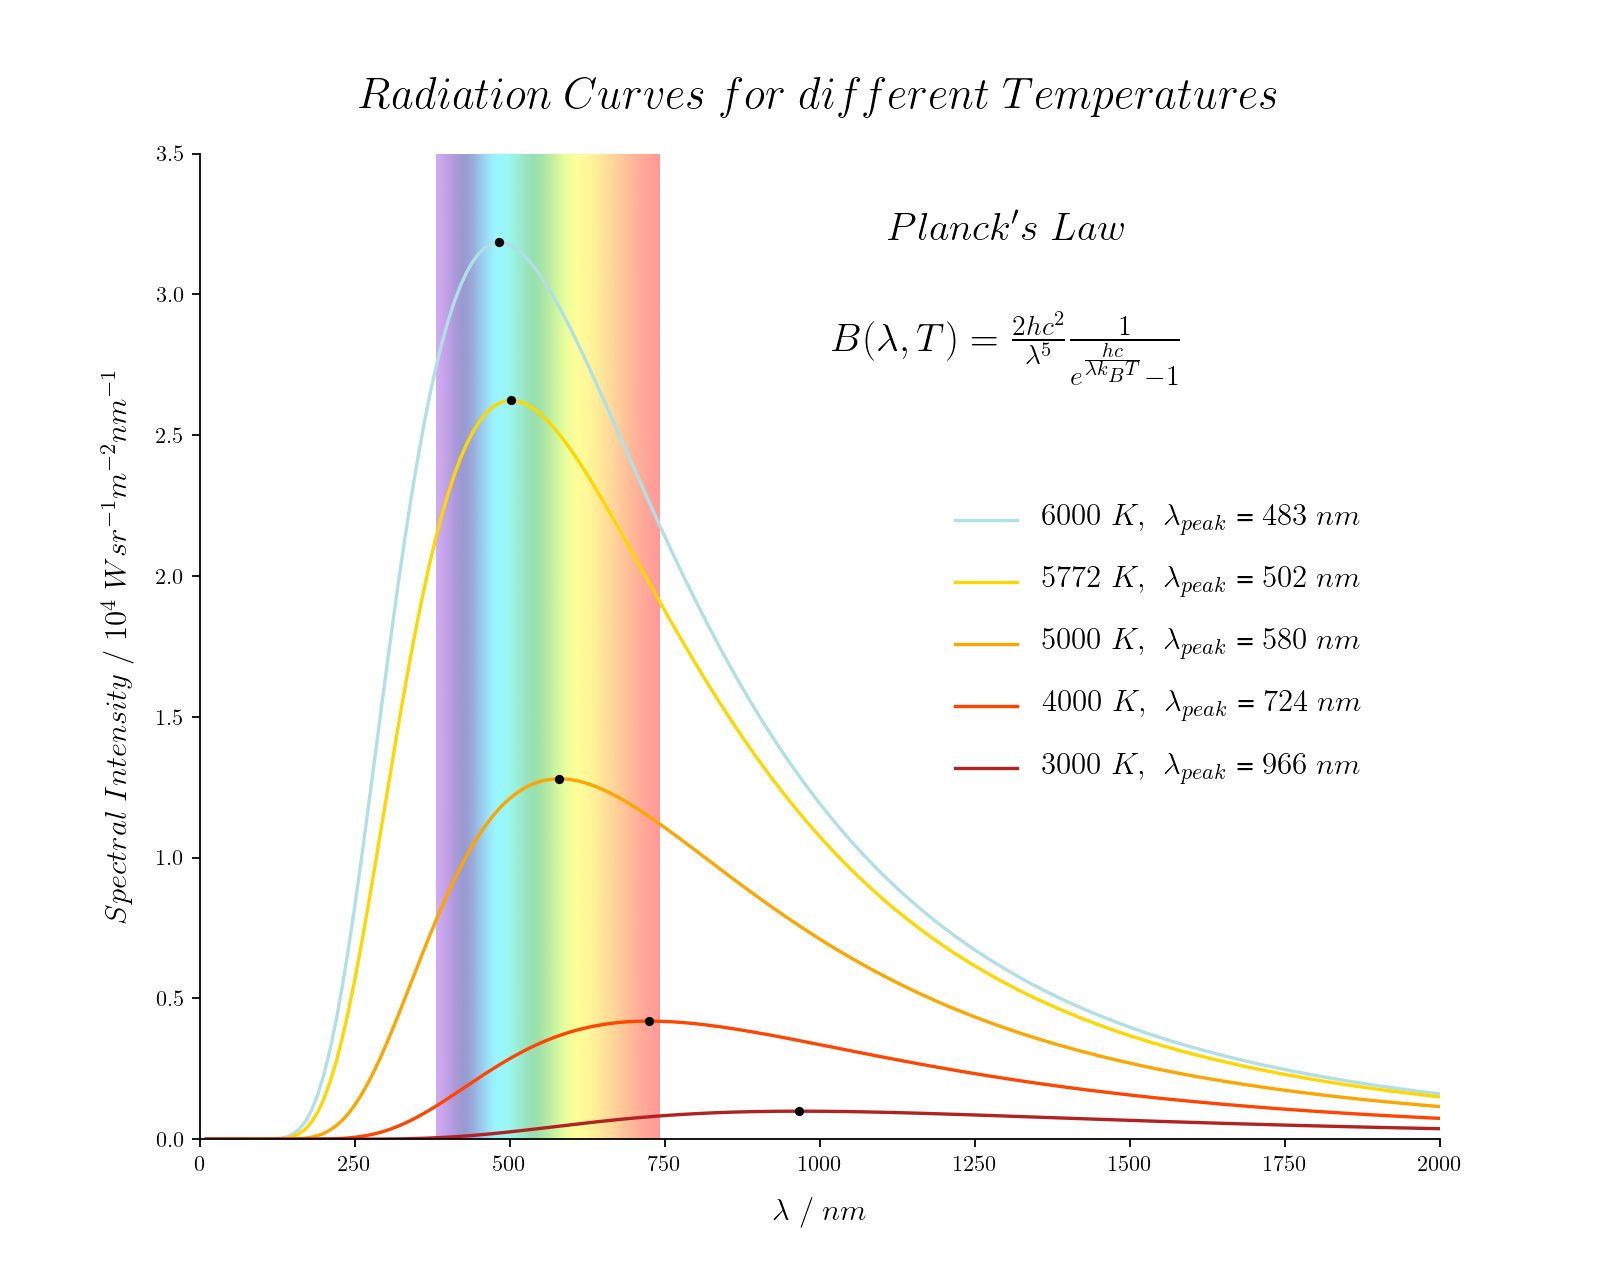

As you can see, black body curves rise sharply at short wavelength and mellow out at longer wavelengths. 

## Star's Radiation Warming it's Host Planets

We can calculate the equilibrium temperature Tp of planets by thinking of them as black bodies. 
Tp is the temperature of the planet just from the absorption of solar radiation and emitting it as well. 
* Black-bodies emit AND absorb radiation 

The equilibrium temperature can be calculated by equating absorbed radiation with the emitted radiation of the planet. 

#### Stellar Luminosity

In [18]:
SIGMA = 5.670374419*10**(-8) # W m^-2 K^-4
R_SUN = 6.957*10**8  # m
L_sun = 4*np.pi*R_SUN**2*SIGMA*T**4

print(f"The Luminosity of the Sun is : {L_sun:.2e} W")

The Luminosity of the Sun is : 3.83e+26 W


Using this luminosity to calculate the planet's equilibrium temp. 

In [22]:
a_EARTH = 0.306    
AU = 149597870700  
K_to_degC = 273.15 
D = 1 * AU         

TeqEarth = T*(1-a_EARTH)**0.25*np.sqrt(R_SUN/2/D)

degSymb = '\u00b0'
print(f"The Equilibrium Temperature of Earth: {TeqEarth:.0f} K")
print(f"The Equilibrium Temperature of Earth in Celsius: {TeqEarth-K_to_degC:.0f} {degSymb}C")

The Equilibrium Temperature of Earth: 254 K
The Equilibrium Temperature of Earth in Celsius: -19 °C


This value is lower than expected because it doesn't take into account the greenhouse gas effect. Below is an interactive slider to help us find the Goldilocks Zone (where water exists in liquid form) for our sun. The albedo of Earth is 0.3.

The slider takes into accoun, albedo, distance from the sun in AU, surface temperature of the star in K and radius of the star in solar radii

In [27]:
@interact(albedo=(0,1,0.1), Distance_from_sun=(0.1,50,0.01), Temp_sun=(2500,10000,1), Stellar_radius=(0.5,30,0.1))
def eqT(albedo, Distance_from_sun, Temp_sun, Stellar_radius):
    Rsun = 6.957*10**8 # m
    Stellar_radius = Stellar_radius*Rsun
    AU = 149597870700 # m
    KtodegC = 273.15
    degSymb = '\u00b0'
    Distance_from_sun = Distance_from_sun * AU
    eqT = Temp_sun*(1-albedo)**0.25*np.sqrt(Stellar_radius/2/Distance_from_sun)
    print(f"The Equilibrium Temperature of this body is: {eqT:.0f} K or {eqT-KtodegC:.0f} {degSymb}C")

interactive(children=(FloatSlider(value=0.0, description='albedo', max=1.0), FloatSlider(value=25.05, descript…